# In this part we should design a fuzzy system that can help the car to reach the goal

# importing the important libraries

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import gym
import matplotlib.pyplot as plt

# Defining the linguistic variables & Terms for each linguistic variable

In [ ]:
Car_Position = ctrl.Antecedent(np.arange(-1.2, 0.6002, 0.0002), 'Car_Position')
Car_Velocity = ctrl.Antecedent(np.arange(-0.07, 0.07002,0.0002), 'Car_Velocity')
Engine_Power = ctrl.Consequent(np.arange(-1, 1.01, 0.01), 'Engine_Power')



Car_Position['much left'] = fuzz.trimf(Car_Position.universe, [-1.2, -1.2, -0.9])
Car_Position['left'] = fuzz.trimf(Car_Position.universe, [-0.9, -0.75, -0.6])
Car_Position['down'] = fuzz.trimf(Car_Position.universe, [-0.85, -0.5, -0.15])
Car_Position['right'] = fuzz.trimf(Car_Position.universe, [-0.3, 0, 0.6])



Car_Velocity.automf(number=5, names=['very low', 'low', 'medium', 'high','very high'])
Engine_Power.automf(number=5, names=['very low', 'low', 'medium', 'high','very high'])

C:\Users\User\anaconda3\envs\First_term\projects_1\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\envs\First_term\projects_1\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\envs\First_term\projects_1\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


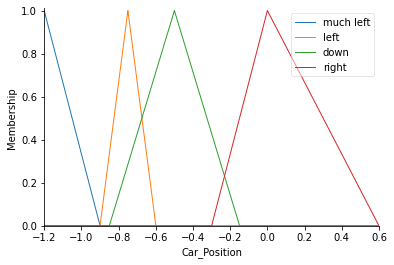

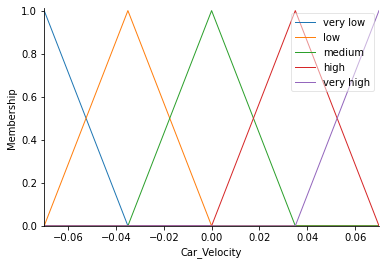

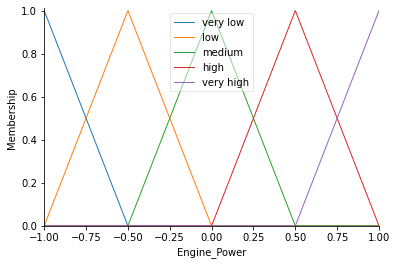

In [ ]:
Car_Position.view()
Car_Velocity.view()
Engine_Power.view()

# Defining rules and also visualizing them

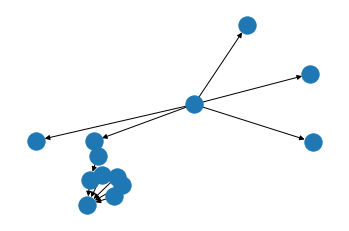

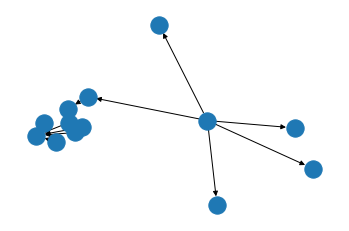

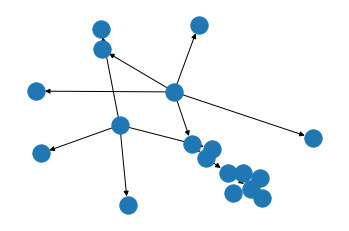

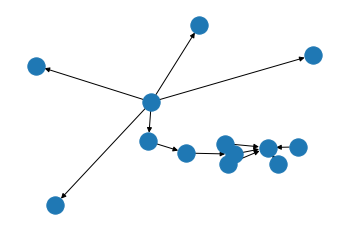

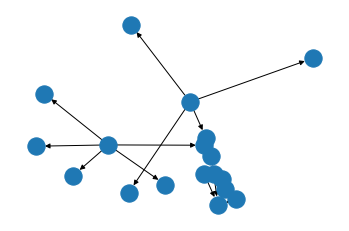

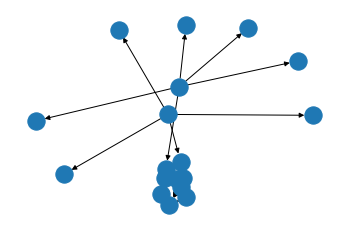

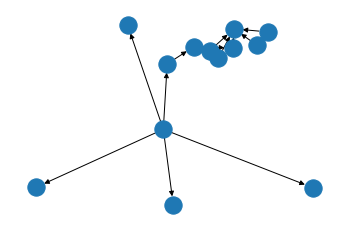

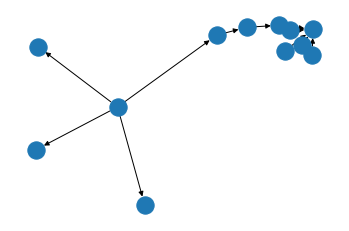

In [ ]:
rule1 = ctrl.Rule(Car_Velocity['very high'], Engine_Power['very high'])
rule2 = ctrl.Rule(Car_Velocity['high'], Engine_Power['very high'])
rule3 = ctrl.Rule((Car_Velocity['medium'] & Car_Position['left']), Engine_Power['very low'])
rule4 = ctrl.Rule(Car_Velocity['low'], Engine_Power['very low'])
rule5 = ctrl.Rule((Car_Velocity['medium'] & Car_Position['down']), Engine_Power['very low'])
rule6 = ctrl.Rule((Car_Velocity['medium'] & Car_Position['right']), Engine_Power['very low'])
rule7 = ctrl.Rule(Car_Velocity['very low'], Engine_Power['very low'])
rule8 = ctrl.Rule( Car_Position['much left'], Engine_Power['very high'])


list_of_rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8]
for rules in list_of_rules:
    rules.view()

Engine_Power_ctrl = ctrl.ControlSystem(rules = list_of_rules)
Engine_Power_rate = ctrl.ControlSystemSimulation(Engine_Power_ctrl)

# making the environment and showing some features about it

In [ ]:
C_M_C = gym.make('MountainCarContinuous-v0')
observation = C_M_C.reset()

# Object's type in the action Space
print("The Action Space is an object of type: {0}\n".format(C_M_C.action_space))
# Shape of the action Space
print("The shape of the action space is: {0}\n".format(C_M_C.action_space))
# Object's type in the Observation Space
print("The Environment Space is an object of type: {0}\n".format(C_M_C.observation_space))
# Shape of the observation space
print("The Shape of the dimension Space are: {0}\n".format(C_M_C.observation_space.shape))
# The high and low values in the observation space
print("The High values in the observation space are {0}, the low values are {1}\n".format(
    C_M_C.observation_space.high, C_M_C.observation_space.low))
# Minimum and Maximum car position
print("The minimum and maximum car's position are: {0}, {1}\n".format(
    C_M_C.observation_space.low[0], C_M_C.observation_space.high[0]))
# Minimum and Maximum car velocity
print("The minimum and maximum car's velocity are: {0}, {1}\n".format(
    C_M_C.observation_space.low[1], C_M_C.observation_space.high[1]))
# Example of observation
print("The Observations at a given timestamp are {0}\n".format(C_M_C.observation_space.sample()))

The Action Space is an object of type: Box([-1.], [1.], (1,), float32)

The shape of the action space is: Box([-1.], [1.], (1,), float32)

The Environment Space is an object of type: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

The Shape of the dimension Space are: (2,)

The High values in the observation space are [0.6  0.07], the low values are [-1.2  -0.07]

The minimum and maximum car's position are: -1.2000000476837158, 0.6000000238418579

The minimum and maximum car's velocity are: -0.07000000029802322, 0.07000000029802322

The Observations at a given timestamp are [-0.95817775 -0.03960969]



# reset and rendering the environment per the episodes and the steps in each episode due to reach the car to the goal by the action that will fired cause by fuzzy controlling system

-------
 reached
in episode 1 in step 156 reach the goal with action [0.8070309378187184]
The reward is : 99.93487010654034 
-------
-------
 reached
in episode 2 in step 149 reach the goal with action [0.814623649699039]
The reward is : 99.9336388309351 
-------
-------
 reached
in episode 3 in step 76 reach the goal with action [0.8329375990373427]
The reward is : 99.93062149561099 
-------
-------
 reached
in episode 4 in step 155 reach the goal with action [0.814623649699039]
The reward is : 99.9336388309351 
-------
-------
 reached
in episode 5 in step 154 reach the goal with action [0.814623649699039]
The reward is : 99.9336388309351 
-------
-------
 reached
in episode 6 in step 149 reach the goal with action [0.814623649699039]
The reward is : 99.9336388309351 
-------
-------
 reached
in episode 7 in step 152 reach the goal with action [0.814623649699039]
The reward is : 99.9336388309351 
-------
-------
 reached
in episode 8 in step 151 reach the goal with action [0.81462364

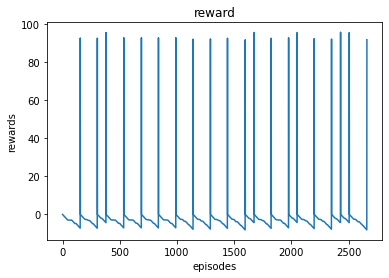

In [ ]:
max_episodes = 20
max_episodes_steps = 200
Reward = []
for episode in range(max_episodes):
    observation = C_M_C.reset()
    r = 0
    for step in range(max_episodes_steps):
        C_M_C.render()

        Position = observation[0]
        Velocity = observation[1]


        Engine_Power_rate.input['Car_Position'] = Position
        Engine_Power_rate.input['Car_Velocity'] = Velocity

        Engine_Power_rate.compute()

        action = [Engine_Power_rate.output['Engine_Power']]

        # Engine_Power.view(sim= Engine_Power_rate)

        observation, reward, done, _ = C_M_C.step(action)

        r+=reward

        # if step == max_episodes_steps - 1 :
        Reward.append(r)

        if not done:

            if step <= 200:
                continue

            if step > 200:
                break

        if done:
            print('-------\n', 'reached')
            print('in episode {0} in step {1} reach the goal with action {2}'.format(episode + 1, step + 1 ,action))
            print('The reward is :', reward, '\n-------')
            break


plt.title("reward")
plt.xlabel('episodes')
plt.ylabel('rewards')
plt.plot(Reward)



C_M_C.close()


print('-------------\n','end','\n-------------')